In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
import os
import nbimporter

In [9]:
ts = np.arange(0,3*10**4)*1e-3
bins = np.linspace(0.1,1,5)
def dang(t, bin):
    return 0.5*bin/(1 + (t - 3)**2) + 0.5*bin/(1 + (t - 7)**2)
vals = []
first_time = True
funcs  = [0]
lag = 3
for t in ts:
    cond = np.mean([dang(t,b) for b in bins]) < 0.2
    if cond and first_time:
        if t > lag:
            t0 = t
            first_time = False
        else:
            cond = 0
    elif not cond and not first_time:
        first_time = True
    vals.append(np.mean([dang(t,b) for b in bins]))
    if cond:
        funcs.append(cond*(t - t0)*0.01)
    else:
        funcs.append(funcs[-1]/(1.001))

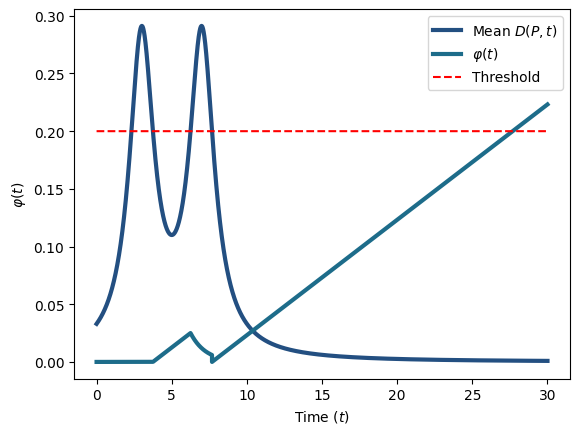

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
colors = sns.color_palette("crest", 5)
ax.set_prop_cycle('color', colors)
ax.plot(ts, vals, linewidth = 3, color = colors[-1], label = "Mean $D(P,t)$")
ax.plot(ts, funcs[1:], linewidth = 3, color = colors[-2], label = "$\\varphi(t)$")
ax.plot(ts, 0.2*np.ones(len(ts)), linewidth = 1.5, linestyle = "dashed", color = "red", label = "Threshold")
ax.set_xlabel("Time ($t$)")
ax.legend()
ax.set_ylabel("$\\varphi(t)$")
fig.savefig("plots/escape_weighted.png", dpi = 300)